In [2]:
#imports

import warnings   
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
from itertools import combinations
import pickle
import time
import webbrowser

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_regression

#import tensorflow as tf


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#load the dataframe----bikes
url = './data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)
bikes.columns=[col.lower().replace(" ","_") if col !='count' else 'total_rentals'for col in bikes.columns]
bikes.columns
bikes=bikes.drop(['atemp','registered', 'casual'],axis=1)
#feature engineering

bikes['hour']=bikes.index.hour
bikes['weekday']=bikes.index.day_name()
features=[col for col in bikes.columns if col !='total_rentals']

numerical_features=['temp','windspeed','humidity']

new_bikes=bikes.copy()
columns_to_dummify=['hour','weekday','season']
for col in columns_to_dummify:
    dummies=pd.get_dummies(bikes[col],prefix=col,drop_first=True,dtype=float)
    bikes=pd.concat([bikes,dummies],axis=1)
#bikes.drop(['weekday','hour'],axis=1,inplace=True)

#classifying features
cat_features=[col for col in features if col not in numerical_features]
alg_dict={'Linear Regression':LinearRegression(),
         'Random Forest': RandomForestRegressor(),
         'Ridge': Ridge(),
         'SVR':SVR()}
models=[('NN',MLPRegressor(max_iter=300,random_state=999)),
       ("boosting",GradientBoostingRegressor(random_state=999)),
        ("knn", KNeighborsRegressor()),
        ('SVR',LinearSVR())
       ]
final_models=[('NN',MLPRegressor(max_iter=600,random_state=999)),
               ('Random Forest',RandomForestRegressor())]
print('DOOOOOOOOONE')

Hello
DOOOOOOOOONE


In [3]:
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.total_rentals
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred)),r2_score(y_test,y_pred)

def train_test_rmse_and_alg(df, feature_cols,algorithm):
    X = df[feature_cols]
    y = df.total_rentals
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123)
    
    alg = algorithm
    alg.fit(X_train, y_train)
    
    y_pred = alg.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred)),r2_score(y_test,y_pred)
def train_test_rmse_and_ss(df, feature_cols,algorithm):
    X = df[feature_cols]
    y = df.total_rentals
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123)
    
    ss=StandardScaler()
    
    X_s_train= ss.fit_transform(X_train)
    
    X_s_test=ss.transform(X_test)
    alg=algorithm
    
    alg.fit(X_s_train, y_train)
    
    y_pred = alg.predict(X_s_test)

    return np.sqrt(mean_squared_error(y_test, y_pred)),r2_score(y_test,y_pred)

In [ ]:
st = time.time()
results_df2=pd.DataFrame(columns=['features','rmse','r2','#features','algorithm'])
count=0
for i in range(1,len(features)+1):
    for combo in list(combinations(features, i)):
        combo_list=list(combo)
        #print(combo_list,type(combo_list))
        length=len(combo_list)        
        count+=1
        if count%50==0:
            print('COUNT',count)
        final_list=[]
            
        for feature in combo_list:
            #print(feature)
            if feature in columns_to_dummify:
                
                final_list.extend([col for col in bikes.columns if feature+'_' in col])
            else:
                final_list.append(feature)
                
        #print('FINAL LIST',final_list)
                        
        for algorithm in alg_dict.items():
            if algorithm[0] in ['Ridge','SVR'] and len(final_list)!=1:
                rmse,r2=train_test_rmse_and_ss(bikes, final_list,algorithm[1])
                results_df2.loc[len(results_df2.index)]= [final_list,rmse,r2,length,algorithm[0]]

            else:
                rmse,r2=train_test_rmse_and_alg(bikes, final_list,algorithm[1])
                results_df2.loc[len(results_df2.index)]= [final_list,rmse,r2,length,algorithm[0]]

et = time.time()
  

with open('resuts_df2.pkl','wb') as file:
    pickle.dump(results_df2,file)
f'It took that many minutes {round((et-st)/60,2)} to get it done'
url = "https://www.youtube.com/watch?v=Udt-9J8nzGE"
webbrowser.open(url,new=1)

# Analyzing Results

In [4]:
with open('resuts_df2.pkl','rb') as file:
    results= pickle.load(file)

In [5]:
results

,features,rmse,r2,#features,algorithm
0,"[season_2, season_3, season_4]",174.572390,0.054983,1,Linear Regression
1,"[season_2, season_3, season_4]",174.568495,0.055025,1,Random Forest
2,"[season_2, season_3, season_4]",174.571952,0.054988,1,Ridge
3,"[season_2, season_3, season_4]",179.702546,-0.001376,1,SVR
4,[holiday],179.576825,0.000025,1,Linear Regression
...,...,...,...,...,...
2039,"[holiday, workingday, weather, temp, humidity,...",141.259154,0.381241,8,SVR
2040,"[season_2, season_3, season_4, holiday, workin...",111.365339,0.615418,9,Linear Regression
2041,"[season_2, season_3, season_4, holiday, workin...",77.843049,0.812099,9,Random Forest
2042,"[season_2, season_3, season_4, holiday, workin...",111.366597,0.615410,9,Ridge


In [6]:
#Best algorithm
results.groupby('algorithm').rmse.min().sort_values()
##E+RandomForest is a clear winner

algorithm
Random Forest         77.757430
Linear Regression    111.365339
Ridge                111.366592
SVR                  131.077315
Name: rmse, dtype: float64

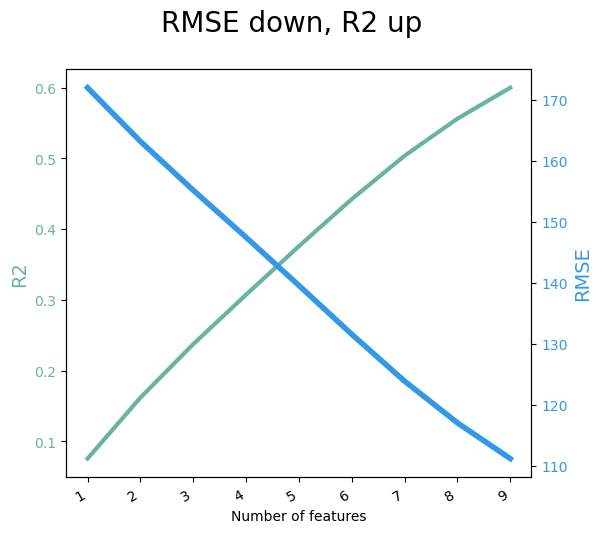

In [7]:
groupy=results.groupby('#features')[['rmse','r2']].mean()
COLOR_R2 = "#69b3a2"
COLOR_RMSE = "#3399e6"

fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()

ax1.plot(groupy.index, groupy.r2, color=COLOR_R2, lw=3)
ax2.plot(groupy.index, groupy.rmse, color=COLOR_RMSE, lw=4)

ax1.set_xlabel("Number of features")
ax1.set_ylabel("R2", color=COLOR_R2, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_R2)

ax2.set_ylabel("RMSE", color=COLOR_RMSE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_RMSE)

fig.suptitle("RMSE down, R2 up", fontsize=20)
fig.autofmt_xdate()
#Obvoiously, to select all features seems the best option

In [8]:
results.sort_values('rmse').groupby('algorithm').first()
#Except for SVR all get the best results with alomst all features

,features,rmse,r2,#features
algorithm,,,,
Linear Regression,"[season_2, season_3, season_4, holiday, workin...",111.365339,0.615418,9
Random Forest,"[season_2, season_3, season_4, workingday, wea...",77.757430,0.812512,8
Ridge,"[season_2, season_3, season_4, workingday, wea...",111.366592,0.615410,8
SVR,"[workingday, temp, humidity, hour_1, hour_2, h...",131.077315,0.467225,4


In [9]:
#Finally, just confirming our results, will anayze the score in RandomForest based on features
results[results['algorithm']=='Random Forest'].groupby('#features')[['rmse','r2']].mean()

,rmse,r2
#features,,
1,170.163766,0.094589
2,160.545461,0.185425
3,152.031901,0.261307
4,142.530123,0.341068
5,130.336917,0.438880
6,115.878161,0.549882
7,101.081385,0.657606
8,88.196721,0.745721
9,77.843049,0.812099


In [ ]:
groupy_rf=results[results['algorithm']=='Random Forest'].groupby('#features')[['rmse','r2']].mean()

COLOR_R2 = "#69b3a2"
COLOR_RMSE = "#3399e6"

fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()

ax1.plot(groupy_rf.index, groupy.r2, color=COLOR_R2, lw=3)
ax2.plot(groupy_rf.index, groupy.rmse, color=COLOR_RMSE, lw=4)

ax1.set_xlabel("Number of features")
ax1.set_ylabel("R2", color=COLOR_R2, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_R2)

ax2.set_ylabel("RMSE", color=COLOR_RMSE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_RMSE)

fig.suptitle("RMSE down, R2 up with Random Forest", fontsize=20)
fig.autofmt_xdate()
#Obvoiously, to select all features seems the best option

In [ ]:
#Curiosity what feature/s are left out in the best solution for LinearRegression and Ridge
for algorithm in alg_dict.keys():
    rmse_min=results[results['algorithm']==algorithm]['rmse'].min()
    list_fea=results[(results['algorithm']==algorithm)&(results['rmse']==rmse_min)]['features'].values[0]
    print(algorithm,rmse_min,[col for col in list_fea if '_' not in col and col not in features])

# Using Pipeline, crossvalidation and SelectKbest to try new models

In [ ]:
st = time.time()
results_df=pd.DataFrame(columns=['features','rmse_ytest','rmse_cv','#features','algorithm'])
new_features=[col for col in new_bikes.columns if col !='total_rentals']
numerical_features=['temp','windspeed','humidity']
categorical_features=[col for col in new_features if col not in numerical_features]

count=0

                        
for model in models:
    X=new_bikes[new_features]
    y=new_bikes.total_rentals

    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=999)

    steps=[('columns',ColumnTransformer(
            transformers=[("cat", OneHotEncoder(categories='auto',sparse_output=False,handle_unknown='ignore'), categorical_features)],
            remainder="passthrough",
            )),
          ('standardization',StandardScaler()),
          ('regressor',model[1])]

    pipeline=Pipeline(steps=steps)
    pipeline.fit(X_train,y_train)
    y_preds=pipeline.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_preds))
    cv=KFold()
    scores=cross_val_score(pipeline,X_train,y_train,cv=cv,scoring='neg_mean_squared_error')
    results_df.loc[len(results_df.index)]= [new_features,rmse,np.sqrt(np.abs(scores)).mean(),\
                                            len(new_features),model[0]]

et = time.time()


with open('resuts_df_plus.pkl','wb') as file:
    pickle.dump(results_df,file)
print(f'It took that many minutes {round((et-st)/60,2)} to get it done')
url = "https://www.youtube.com/watch?v=Udt-9J8nzGE"
webbrowser.open(url,new=1)

In [ ]:

with open('resuts_df_plus.pkl','rb') as file:
    results=pickle.load(file)
results

# from now on, I will only work with rf and NN.
# I will try using selectKbest just to confirm the right number of features

In [ ]:
new_features=[col for col in new_bikes.columns if col !='total_rentals']
results_df=pd.DataFrame(columns=['features','rmse_cv','rmse_y_test','#features','algorithm'])
#num_features=15

X=new_bikes[new_features]
y=new_bikes.total_rentals

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=999)

for num_features in range(44,0,-10):
    

    for model in final_models:

        steps=[('columns',ColumnTransformer(
                transformers=[("cat", OneHotEncoder(categories='auto',sparse_output=False,handle_unknown='ignore'), [0,3,7,8])],
                remainder="passthrough",
            )),
               ('feature_selection', SelectKBest(f_regression,k=num_features)),
              ('standardization',MinMaxScaler()),
              ('regressor',model[1])]

        pipe=Pipeline(steps=steps)
        pipe.fit(X_train,y_train)
        mask=pipe.named_steps['feature_selection'].get_support()
        column_names=pipe.named_steps['columns'].get_feature_names_out()
        selection=[''.join(a.split('__')[1]) for a,b in zip(column_names,mask) if b]
        print(num_features,len(mask),len(selection))
        y_preds=pipe.predict(X_test)
        rmse=np.sqrt(mean_squared_error(y_test,y_preds))
        cv=KFold(n_splits=3)
        scores=cross_val_score(pipe,X_train,y_train,cv=cv,scoring='neg_mean_squared_error')
        results_df.loc[len(results_df.index)] = [selection,np.sqrt(np.abs(scores).mean()),rmse,len(selection) , model[0]]
        
with open('results_nn_rf.pkl','wb') as f:
    pickle.dump(results_df,f)
print('DONE')

In [ ]:
with open('results_nn_rf.pkl','rb') as f:
    results=pickle.load(f)
results.groupby('#features')['rmse_y_test'].min()

In [ ]:
results.sort_values('rmse_y_test')

# Tuning the model and analyzing the most relevant features

## RF

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid_pipe = {'regressor__n_estimators': n_estimators,
               'regressor__max_features': max_features,
               'regressor__max_depth': max_depth,
               'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf,
               'regressor__bootstrap': bootstrap}
random_grid_pipe

In [ ]:
new_features=[col for col in new_bikes.columns if col !='total_rentals']

X=new_bikes[new_features]
y=new_bikes.total_rentals

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=999)

steps=[('columns',ColumnTransformer(
                transformers=[("cat", OneHotEncoder(categories='auto',sparse_output=False,handle_unknown='ignore'), [0,3,7,8])],
                remainder="passthrough",
            )),
              ('standardization',MinMaxScaler()),
              ('regressor',RandomForestRegressor())]

final_pipe=Pipeline(steps=steps)


rf_random = RandomizedSearchCV(estimator = final_pipe, param_distributions = random_grid_pipe, 
                               n_iter = 100, cv = 3, verbose=0, random_state=42, 
                               n_jobs = -1)

best_model=rf_random.fit(X_train,y_train)
preds=best_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,preds))
print("Done")

In [ ]:
best_params=best_model.best_params_
final_params={k.split('__')[1]: v for k,v in best_params.items()}
final_params

In [ ]:
new_features=[col for col in new_bikes.columns if col !='total_rentals']

X=new_bikes[new_features]
y=new_bikes.total_rentals

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=999)

steps=[('columns',ColumnTransformer(
                transformers=[("cat", OneHotEncoder(categories='auto',sparse_output=False,handle_unknown='ignore'), [0,3,7,8])],
                remainder="passthrough",
            )),
              ('standardization',MinMaxScaler()),
              ('regressor',RandomForestRegressor(**final_params))]

final_pipe=Pipeline(steps=steps)
final_pipe.fit(X_train,y_train)
preds=final_pipe.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,preds))
rmse

In [ ]:
features_importances=final_pipe[-1].feature_importances_
features_names=final_pipe[0].get_feature_names_out()

In [ ]:
names_importances=[(a.split("__")[1],b) for a,b in zip(features_names,features_importances)]
best_features=sorted(names_importances,key=lambda x: x[1], reverse=True)[:5]
best_names=[x[0] for x in best_features]
best_importances=[x[1] for x in best_features]
plt.bar(best_names,best_importances);

## NN

In [ ]:
new_features=[col for col in new_bikes.columns if col !='total_rentals']
param_grid = {
    'regressor__hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'regressor__max_iter': [50, 100,400, 700],
    'regressor__activation': ['tanh', 'relu'],
    'regressor__solver': ['sgd', 'adam'],
    'regressor__alpha': [0.0001, 0.05],
    'regressor__learning_rate': ['constant','adaptive'],
}

X=new_bikes[new_features]
y=new_bikes.total_rentals

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=999)

steps=[('columns',ColumnTransformer(
                transformers=[("cat", OneHotEncoder(categories='auto',sparse_output=False,handle_unknown='ignore'), [0,3,7,8])],
                remainder="passthrough",
            )),
              ('standardization',MinMaxScaler()),
              ('regressor',MLPRegressor(max_iter=600,random_state=999))]

final_pipe=Pipeline(steps=steps)


grid = GridSearchCV(final_pipe, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_) 


grid_predictions = grid.predict(X_test)
print('RMSE: ',np.sqrt(mean_squared_error(y_test,grid_predictions)))
print('R2: ',r2_score(y_test,grid_predictions))
print("Done")
grid.best_params_

In [7]:
best_param_grid={'regressor__activation': 'relu', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (120, 80, 40), 'regressor__learning_rate': 'constant', 'regressor__max_iter': 100, 'regressor__solver': 'adam'}
# RMSE:  71.74701953565547
# R2:  0.8401473439916183
# Done
# {'regressor__activation': 'relu',
#  'regressor__alpha': 0.0001,
#  'regressor__hidden_layer_sizes': (120, 80, 40),
#  'regressor__learning_rate': 'constant',
#  'regressor__max_iter': 100,
#  'regressor__solver': 'adam'}

In [14]:
new_features=[col for col in new_bikes.columns if col !='total_rentals']
best_param_grid = {
    'regressor__hidden_layer_sizes': (120,80,40),
    'regressor__max_iter': 100,
    'regressor__activation': 'relu',
    'regressor__solver': 'adam',
    'regressor__alpha': 0.0001,
    'regressor__learning_rate': 'constant',
    'rgressor__random_state':999
}
final_params={key.split('__')[1]:value for key,value in best_param_grid.items()}

X=new_bikes[new_features]
y=new_bikes.total_rentals

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=999)

steps=[('columns',ColumnTransformer(
                transformers=[("cat", OneHotEncoder(categories='auto',sparse_output=False,handle_unknown='ignore'), [0,3,7,8])],
                remainder="passthrough",
            )),
              ('standardization',MinMaxScaler()),
              ('regressor',MLPRegressor(**final_params))]

final_pipe=Pipeline(steps=steps)


final_pipe.fit(X_train, y_train)




predictions = final_pipe.predict(X_test)
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('R2: ',r2_score(y_test,predictions))
print("Done")

RMSE:  71.74701953565547
R2:  0.8401473439916183
Done


In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [48]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [40]:
bikes.drop(['weekday','hour','season'],axis=1,inplace=True)
train_dataset = bikes.sample(frac=0.8, random_state=0)
test_dataset = bikes.drop(train_dataset.index)

In [41]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('total_rentals')
test_labels = test_features.pop('total_rentals')

In [42]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [43]:
normalizer.adapt(np.array(train_features).astype('float32'))

In [44]:
print(normalizer.mean.numpy())

[[2.8476287e-02 6.7757487e-01 1.4178425e+00 2.0269972e+01 6.2016533e+01
  1.2839883e+01 4.1566174e-02 4.1566197e-02 3.9729014e-02 3.9729021e-02
  4.2829279e-02 4.1795827e-02 4.1910667e-02 4.3977495e-02 4.3058902e-02
  4.0877257e-02 4.1681018e-02 4.1681025e-02 4.0762439e-02 4.3288574e-02
  4.1221742e-02 4.1221716e-02 4.1336540e-02 4.0992081e-02 4.2140305e-02
  4.2829257e-02 4.1451361e-02 4.1106895e-02 4.1681003e-02 1.4180726e-01
  1.4846705e-01 1.4548160e-01 1.3755882e-01 1.4054430e-01 1.4536674e-01
  2.5066015e-01 2.5215304e-01 2.5088990e-01]]


In [45]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [37]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 38)                77        
 tion)                                                           
                                                                 
 dense (Dense)               (None, 64)                2496      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6798 (26.56 KB)
Trainable params: 6721 (26.25 KB)
Non-trainable params: 77 (312.00 Byte)
_________________________________________________________________


In [46]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 11.4 s, sys: 1.2 s, total: 12.6 s
Wall time: 10 s


In [51]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

69/69 [==============================] - 0s 334us/step


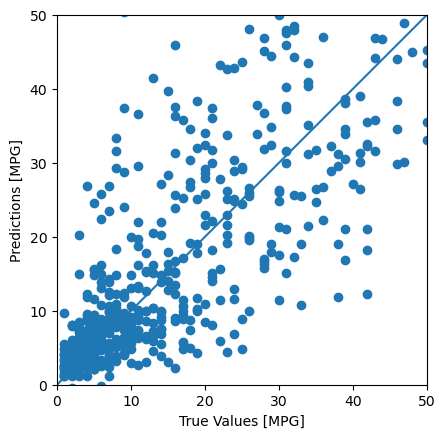

In [52]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [54]:
np.sqrt(mean_squared_error(test_labels,test_predictions))

73.33426089518863